In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
df = pd.read_csv("housing1.csv")

In [6]:
df.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [7]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Check for outliers

<AxesSubplot:>

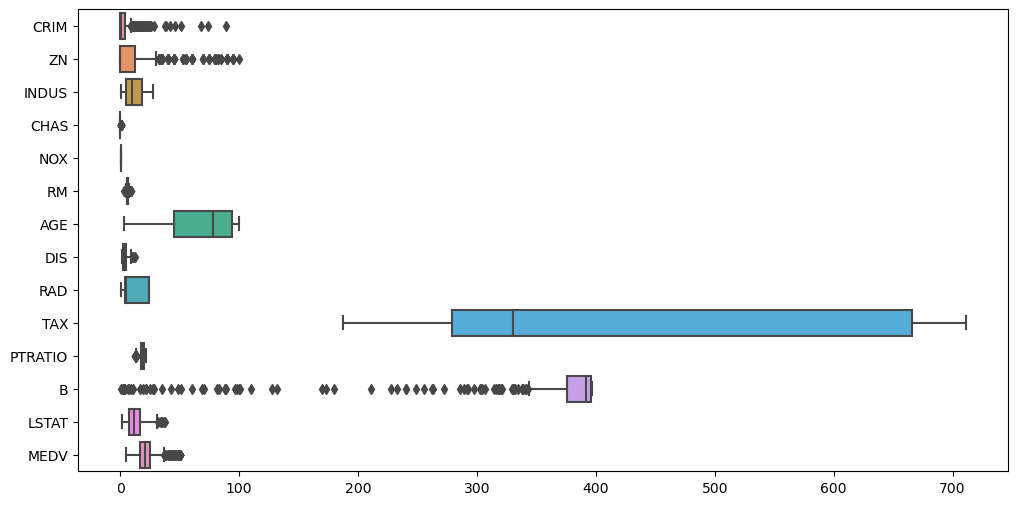

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")

The variables CRIM, INDUS, NOX, AGE, and B have a significant number of outliers, suggesting that these variables may have extreme values that are very different from the majority of the data points.

The variable RM has a relatively small range of values (approximately 3 to 9) and appears to have a normal distribution with no outliers.

The variables ZN, CHAS, RAD, TAX, and PTRATIO have some outliers but not as many as the other variables.

The variable DIS appears to have a slightly right-skewed distribution with a small number of outliers.

The variable LSTAT has a large range of values (approximately 2 to 38) and a significant number of outliers.
	
    Overall, the plot suggests that the Boston Housing dataset has a number of variables with non-normal distributions and   outliers, which may need to be addressed.


# Visualization of distribution of each variable

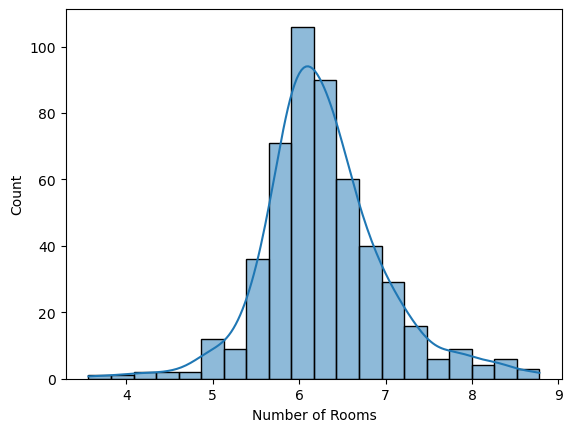

In [8]:
sns.histplot(data=df, x="RM", bins=20, kde=True)
plt.xlabel("Number of Rooms")
plt.show()

this plot represents the average number of rooms per dwelling. The histogram is divided into 20 bins, and the density curve (KDE) is overlaid on top of the histogram bars.

From the histogram, we can see that the "RM" feature is approximately normally distributed, with the highest frequency of dwellings having around 6 rooms. It shows that most houses have between 5 and 7 rooms, with a smaller number of houses having fewer or more rooms.

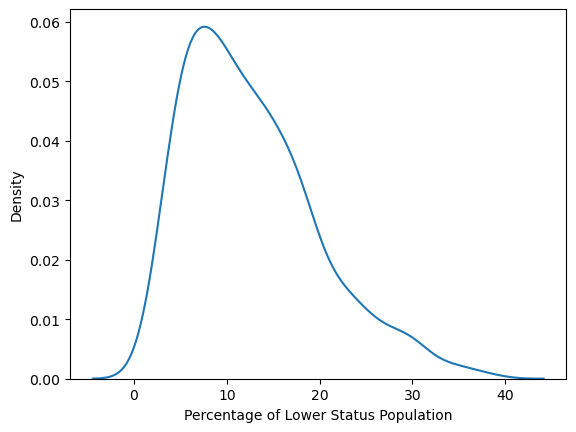

In [20]:
sns.kdeplot(data=df, x="LSTAT")
plt.xlabel("Percentage of Lower Status Population")
plt.show()

The plot is a kernel density estimation (KDE) plot of the "LSTAT" feature in the dataset, which represents the percentage of lower status population in the area.
	From the KDE plot, we can see that the "LSTAT" feature is heavily skewed to the right, with the majority of the values below 20 and a long tail extending to the right. The peak density is around 5-10, indicating that most of the areas in the dataset have a relatively low percentage of lower status population. Which could be an indicator of higher socioeconomic status. 

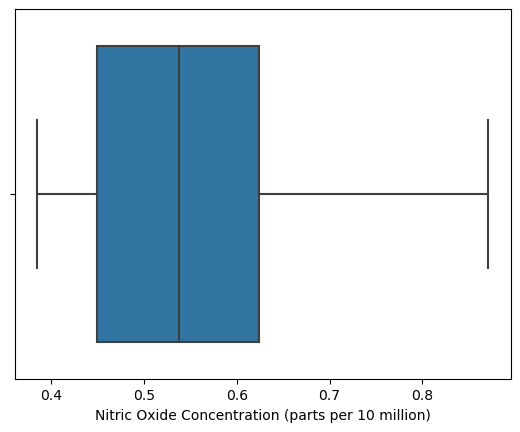

In [21]:
sns.boxplot(data=df, x="NOX")
plt.xlabel("Nitric Oxide Concentration (parts per 10 million)")
plt.show()

The plot is a boxplot of the "NOX" feature in the dataset, which represents the nitric oxide concentration in parts per 10 million.
	the plot shows that while most areas have a concentration around the median value which is around 0.54.There are also some outliers, which are represented as individual points beyond the whiskers of the boxplot.

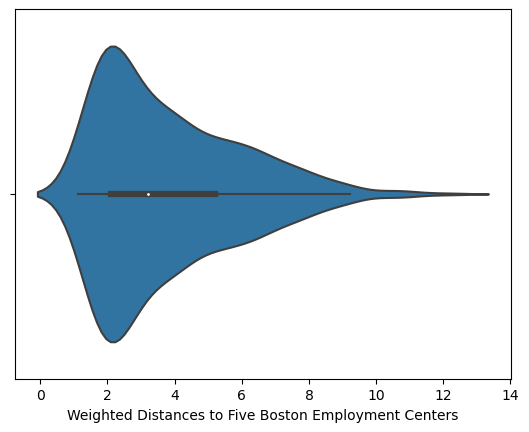

In [22]:
sns.violinplot(data=df, x="DIS")
plt.xlabel("Weighted Distances to Five Boston Employment Centers")
plt.show()

The plot is a violin plot of the "DIS" feature in the dataset, which represents the weighted distances to five Boston employment centers.
	From the violin plot, we can see that the "DIS" feature has a bimodal distribution, with two peaks around 1.5 and 4.0, indicating that the areas in the dataset can be divided into two groups based on their proximity to employment centers. The areas with lower "DIS" values are likely to be located closer to employment centers, while the areas with higher "DIS" values are likely to be located further away.

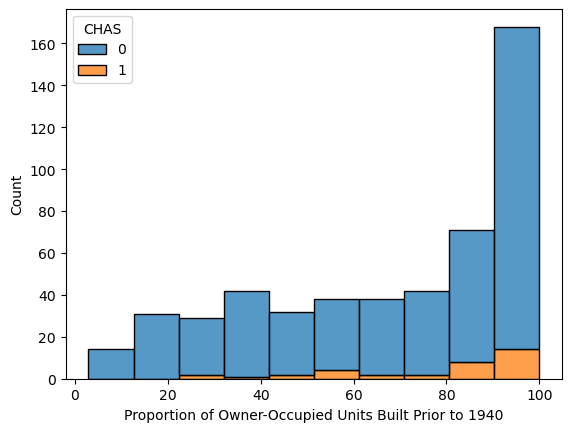

In [23]:
sns.histplot(data=df, x="AGE", hue="CHAS", multiple="stack")
plt.xlabel("Proportion of Owner-Occupied Units Built Prior to 1940")
plt.show()

The plot is a stacked histogram of the "AGE" feature in the dataset, which represents the proportion of owner-occupied units built prior to 1940. The histogram is stacked by the binary "CHAS" feature, which indicates whether the area borders the Charles River.
	This plot provides insight into the distribution of the proportion of owner-occupied units built prior to 1940 in the areas represented in the Boston Housing dataset. It shows that the areas that do not border the Charles River tend to have a higher proportion of older owner-occupied units, while the areas that do border the river tend to have a more even distribution of age of owner-occupied units. Understanding the distribution of this feature in relation to the "CHAS" feature can be useful in identifying potential factors that may influence the age and condition of housing in different areas, and how these factors may affect housing prices.

C:\Users\smite\AppData\Local\Temp\ipykernel_4160\3049239712.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x="TAX", hue="RAD", multiple="stack")


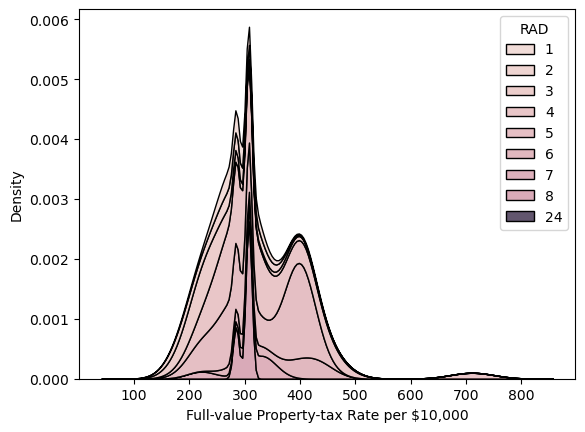

In [24]:
sns.kdeplot(data=df, x="TAX", hue="RAD", multiple="stack")
plt.xlabel("Full-value Property-tax Rate per $10,000")
plt.show()

The plot is a stacked kernel density plot of the "TAX" feature in the dataset, which represents the full-value property-tax rate per $10,000.
	From the plot, we can see that the "TAX" feature has a bimodal distribution, with two peaks around 250 and 400. The distribution also varies based on the value of the "RAD" feature, with different peaks and levels of density for different values of "RAD". For example, for "RAD" values of 1, 2, 3, and 24, the distribution has a peak around 400, while for "RAD" values of 4, 5, and 6, the distribution has a peak around 300. It shows that there are distinct patterns in the distribution of property-tax rates for different levels of accessibility to radial highways, which could be an indicator of the influence of location and transportation infrastructure on property-tax rates.

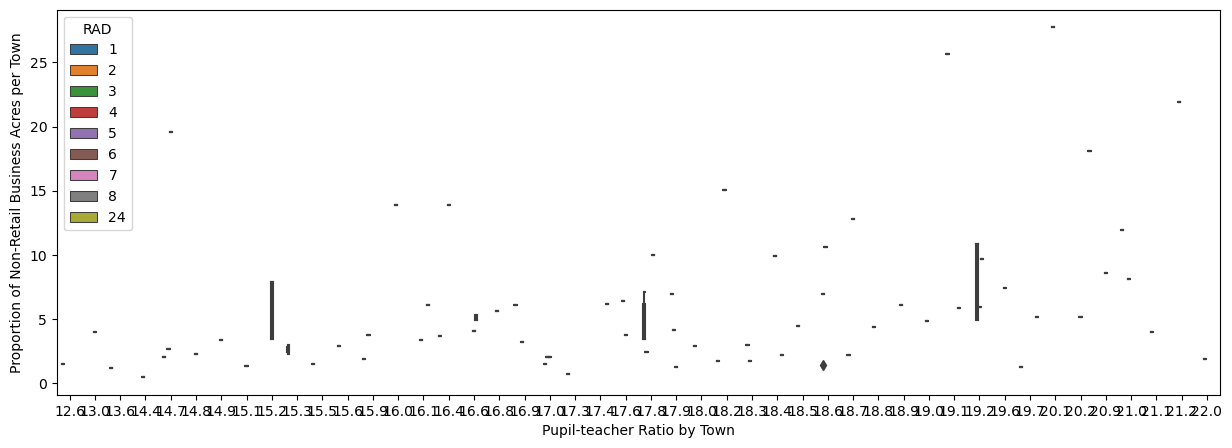

In [19]:
ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x="PTRATIO", y="INDUS", hue="RAD")
plt.xlabel("Pupil-teacher Ratio by Town")
plt.ylabel("Proportion of Non-Retail Business Acres per Town")
plt.show()

The plot is a boxplot of the "PTRATIO" feature on the x-axis, which represents the pupil-teacher ratio by town, and the "INDUS" feature on the y-axis, which represents the proportion of non-retail business acres per town. The boxplots are also colored and split by the "RAD" feature, which represents the accessibility to radial highways, and has integer values ranging from 1 to 24.
	From the boxplot, we can see that there are some variations in the distribution of the pupil-teacher ratio and the proportion of non-retail business acres per town for different values of "RAD". Specifically, for "RAD" values of 1 and 2, there seems to be a higher proportion of non-retail business acres per town, while for "RAD" values of 4, 5, and 6, there seems to be a higher pupil-teacher ratio.
    The boxplot also shows the distribution of the "PTRATIO" and "INDUS" features for each value of "RAD", with the boxes representing the interquartile range (IQR) of the data, the whiskers extending to the most extreme values that are within 1.5 times the IQR from the box, and the dots representing outliers beyond that range.
    The plot shows that there may be some variation in these features depending on the level of accessibility to radial highways.

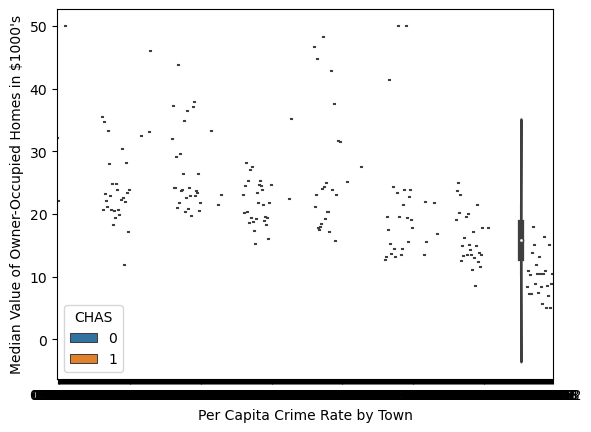

In [26]:
sns.violinplot(data=df, x="CRIM", y="MEDV", hue="CHAS", split=True)
plt.xlabel("Per Capita Crime Rate by Town")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.show()

This plot is a violin plot that shows the relationship between the "CRIM" feature on the x-axis, which represents the per capita crime rate by town, and the "MEDV" feature on the y-axis, which represents the median value of owner-occupied homes in $1000's. The plot is also split and colored by the "CHAS" feature, which represents whether the property bounds the Charles River or not.
	From the plot, we can see that there is a higher concentration of homes with higher median values in areas where the per capita crime rate is lower. Additionally, we can see that the properties that bound the Charles River tend to have higher median values and lower per capita crime rates compared to the properties that do not.The plot also shows the distribution of the "CRIM" and "MEDV" features for each value of "CHAS", with the violins representing the probability density of the data at different values.
     It shows that the properties that bound the Charles River tend to have higher median values and lower crime rates, and that areas with lower crime rates generally have higher median property values.

co-relation between variables

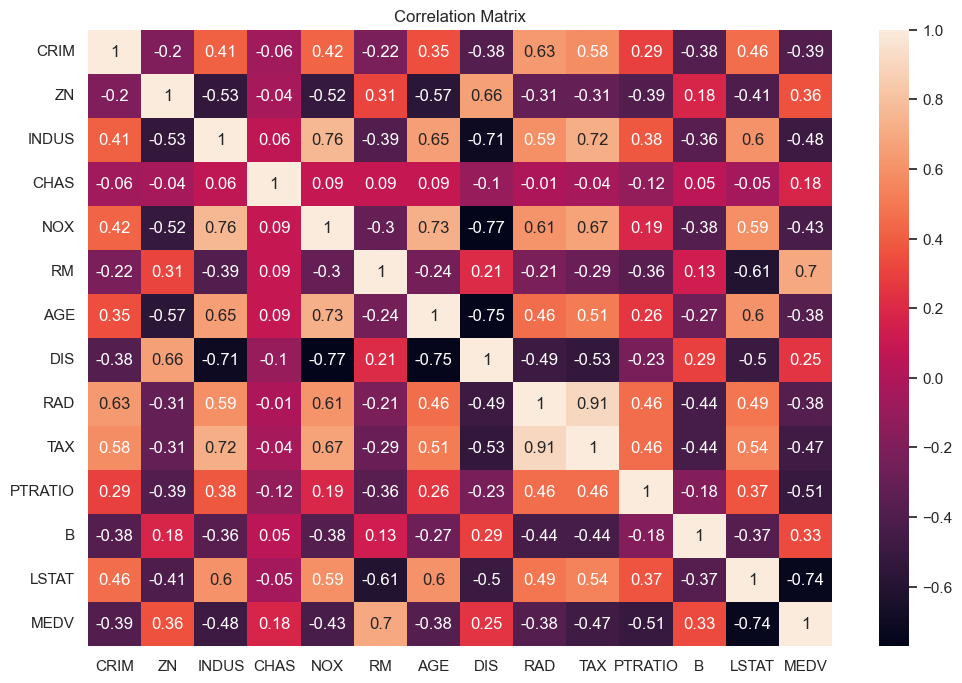

In [53]:
corr_matrix = df.corr().round(2)

sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(data=corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

The heatmap of the correlation matrix shows the correlation between each pair of features in the dataset. The color and the number in each cell indicate the strength and direction of the correlation.

From the plot, we can see that the target variable MEDV has a strong positive correlation with RM (number of rooms), and a strong negative correlation with LSTAT (percentage of lower status population) and PTRATIO (pupil-teacher ratio by town).

There are also some strong correlations among the predictor variables. For example, INDUS (proportion of non-retail business acres per town) has a strong positive correlation with NOX (nitric oxide concentration) and a strong negative correlation with DIS (weighted distances to five Boston employment centers). There is also a strong negative correlation between AGE (proportion of owner-occupied units built prior to 1940) and DIS.